In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# Function to load a dataset and handle missing values
def handle_missing_values(file_name):
    # Load the dataset
    df = pd.read_csv(file_name)

    # Print the general information of the DataFrame
    print(df.head())
    print(df.tail())
    print(df.info())

    # Check for null values
    print(f"\nBefore imputation for {file_name}: ")
    print(df.isnull().sum())

    # Fill missing values using the specified method
    df_filled = df.copy()
    for column in df.columns:
        if df[column].dtype == 'object':  # Categorical data
            df_filled[column].fillna(df[column].mode()[0], inplace=True)
        else:  # Numeric data
            df_filled[column].fillna(df[column].mean(), inplace=True)

    # Check for missing values after imputation to show whether the datasets has been imputed
    print(f"\nAfter imputation for {file_name}: ")
    print(df_filled.isnull().sum())

    # Return the imputed DataFrame
    return df_filled


   epi_week                                   disease  no._of_cases
0  2012-W01  Acute Upper Respiratory Tract infections        2932.0
1  2012-W01                      Acute Conjunctivitis         120.0
2  2012-W01                           Acute Diarrhoea         491.0
3  2012-W01                                Chickenpox          18.0
4  2012-W02  Acute Upper Respiratory Tract infections        3189.0
      epi_week                                   disease  no._of_cases
2552  2022-W52  Acute Upper Respiratory Tract infections        2336.0
2553  2022-W52                      Acute Conjunctivitis          64.0
2554  2022-W52                           Acute Diarrhoea         320.0
2555  2022-W52                                Chickenpox           7.0
2556  2022-W52                                      HFMD          12.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------      

<Figure size 1000x500 with 0 Axes>

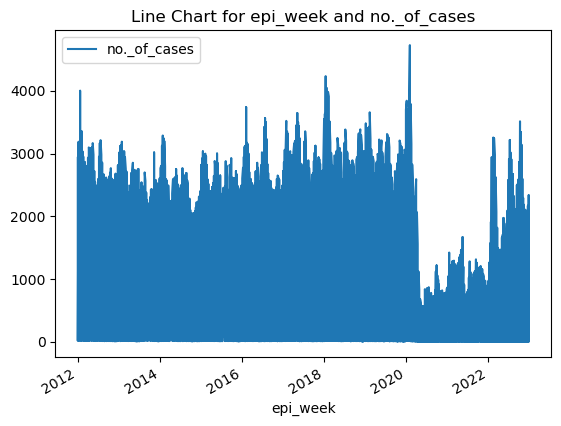

<Figure size 1000x500 with 0 Axes>

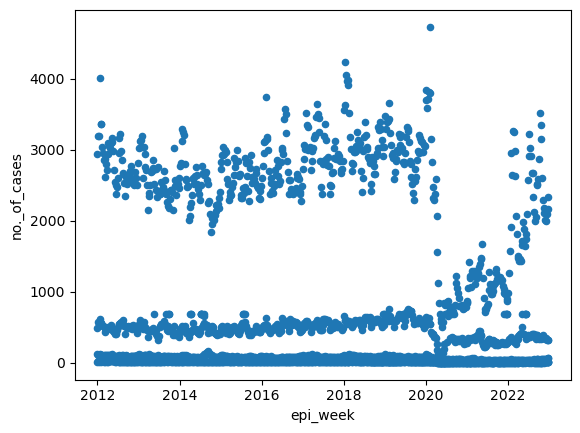

Dataset: Index(['month', 'mean_rh'], dtype='object')
Summary Statistics:
          mean_rh
count  500.000000
mean    81.925893
std      4.627802
min      8.000000
25%     80.200000
50%     82.100000
75%     84.200000
max     90.300000


<Figure size 1000x500 with 0 Axes>

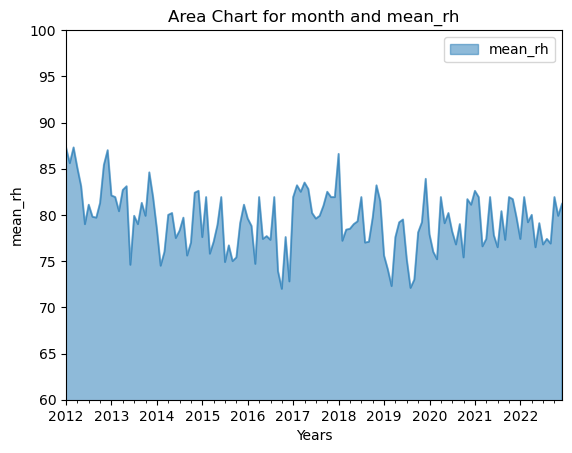

<Figure size 1000x500 with 0 Axes>

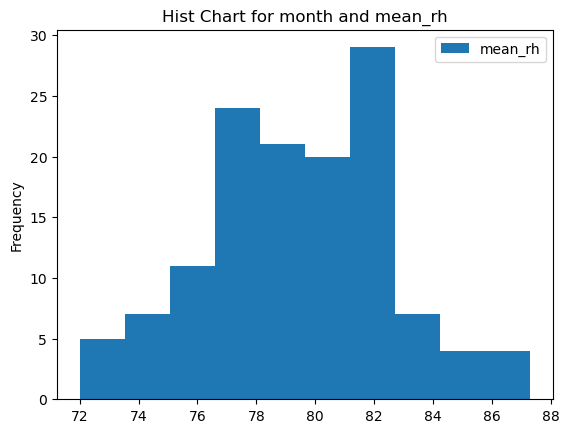

Dataset: Index(['month', 'no_of_rainy_days'], dtype='object')
Summary Statistics:
       no_of_rainy_days
count        501.000000
mean          14.098739
std            4.836602
min            2.000000
25%           11.000000
50%           14.000000
75%           18.000000
max           27.000000


<Figure size 1000x500 with 0 Axes>

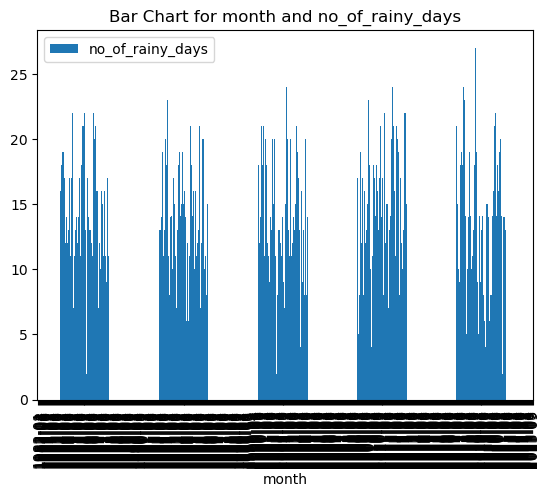

In [3]:
def analyze_datasets(file_names, chart_types):
    # Load and impute the datasets
    dfs = [handle_missing_values(file_name) for file_name in file_names]

    # Convert 'epi_week' to datetime in the first dataset
    dfs[0]['epi_week'] = pd.to_datetime(dfs[0]['epi_week'] + '-1', format='%Y-W%W-%w')

    # Generate charts for each dataset
    for df, chart_types in zip(dfs, chart_types):
        print(f"Dataset: {df.columns}")
        print("Summary Statistics:")
        print(df.describe())


        for chart_type in chart_types:
            plt.figure(figsize=(10, 5))
            if chart_type == 'pie':
                df[df.columns[-1]].value_counts().plot(kind=chart_type, autopct='%1.1f%%')
            elif chart_type == 'scatter':
                # For scatter plot, we need at least two columns
                df.plot(kind=chart_type, x=df.columns[0], y=df.columns[-1])
            elif chart_type == 'box':
                # Use 'epi_week' on the x-axis and 'no. of cases' on the y-axis
                df.boxplot(column='no._of_cases', by='epi_week', vert=False)
                plt.title(f'{chart_type.capitalize()} Chart for {df.columns[0]} and {df.columns[-1]}')
                plt.xlabel('no._of_cases')
                plt.show()
            elif chart_type in ['area']:
               # For area charts, filter data for years 2012 to 2022
                df[df.columns[0]] = pd.to_datetime(df[df.columns[0]], format='%Y-%m')  # Convert the date column to datetime
                df = df[(df[df.columns[0]].dt.year >= 2012) & (df[df.columns[0]].dt.year <= 2022)]  # Filter data for years 2012 to 2022
                ax = df.plot(kind=chart_type, x=df.columns[0], y=df.columns[-1], alpha=0.5)
                ax.set_ylim(60, 100)  # Set y-axis limits
                ax.set_xlabel('Years')  # Set x-axis label
                ax.set_ylabel('mean_rh')  # Set y-axis label
                plt.title(f'{chart_type.capitalize()} Chart for {df.columns[0]} and {df.columns[-1]}')
                plt.show()
            elif chart_type == 'bar' and 'Rainfall' in df.columns[0]:
                # For 'RainfallMonthlyNumberofRainDays.csv', create a bar chart
                df['date'] = pd.to_datetime(df['date'], format='%Y-%m')  # Convert the date column to datetime
                df.set_index('date', inplace=True)  # Set the date column as the index
                df_resampled = df.resample('Y').sum()  # Resample data annually and sum the values
                df_resampled.plot(kind=chart_type, legend=False)
                plt.title(f'{chart_type.capitalize()} Chart for {df.columns[0]} and {df.columns[-1]}')
                plt.xlabel('Year')
                plt.ylabel('Number of Rainfall Days')
                plt.show()
            else:
                df.plot(kind=chart_type, x=df.columns[0], y=df.columns[-1])
                plt.title(f'{chart_type.capitalize()} Chart for {df.columns[0]} and {df.columns[-1]}')
            plt.show()

# Analyze datasets with different chart types
datasets = ['AverageDailyPolyclinicAttendancesforSelectedDiseases.csv', 'RelativeHumidityMonthlyMean.csv', 'RainfallMonthlyNumberofRainDays.csv']
chart_types = [['line', 'scatter'], ['area', 'hist'], ['bar']]

analyze_datasets(datasets, chart_types)
